In [ ]:
# COLAB에서 나눔 폰트로 적용하는 방법입니다.# 셀1

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 판다스 버전 확인
pd.show_versions()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.10.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 6.1.85+
Version          : #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 2.0.3
numpy            : 1.25.2
pytz             : 2023.4
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.1.2
Cython           : 3.0.10
pytest           : 7.4.4
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.4
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.9
jinja2           : 3.1.4
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.12.3
bottleneck       : None

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [8]:
path = '/content/drive/MyDrive/멀티캠퍼스/13장_data'
train = pd.read_csv(path + '/ratings_train.txt', encoding='utf-8', sep='\t')
train_df = train.copy()

In [9]:
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [10]:
train_df.shape

(150000, 3)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [12]:
condition = train_df['document'].notnull()
# null 값 없는 데이터 추출

train_df[condition]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [13]:
train_df = train_df[condition]
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [15]:
train_df['label'].value_counts()

label
0    75170
1    74825
Name: count, dtype: int64

In [16]:
# 전처리 : 정규표현식 사용, 한글 외 문자 제거

import re
# re : regular expression 정규표현식

In [17]:
train_df['document']

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 149995, dtype: object

In [18]:
train_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x ))

0                                         아 더빙 진짜 짜증나네요 목소리
1                              흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                교도소 이야기구먼 솔직히 재미는 없다 평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                     인간이 문제지 소는 뭔죄인가 
149996                                          평점이 너무 낮아서 
149997                       이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다 
149998                          청춘 영화의 최고봉 방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 149995, dtype: object

In [19]:
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x ))
train_df.head(3)

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [20]:
# 평가용 데이터 전처리

test_df = pd.read_csv(path+'/ratings_test.txt', encoding='utf-8', sep='\t')

In [21]:
test_df.shape

(50000, 3)

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [23]:
test_df[test_df['document'].notnull()]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [24]:
test_df = test_df[test_df['document'].notnull()]

In [25]:
test_df.head(3)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [27]:
test_df['label'].value_counts()

label
1    25171
0    24826
Name: count, dtype: int64

In [28]:
test_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))

0                                                굳 ㅋ
1                                                   
2                   뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아
3                         지루하지는 않은데 완전 막장임 돈주고 보기에는 
4         만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠 
                            ...                     
49995      오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996       의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 
49997                그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다
49998     절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네
49999                                     마무리는 또 왜이래
Name: document, Length: 49997, dtype: object

In [29]:
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))

In [30]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 45.7 MB/s eta 0:00:00


In [31]:
# 분석 모델 구축

# 형태소 분석기 가져오기
from konlpy.tag import Okt

okt = Okt()

In [32]:
# 토큰화
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    # text 입력받아 형태소 분석, 토큰 생성
    return tokens

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tf-idf 활용 >> vector(숫자) 생성 (문자 >> 숫자)

tfidf= TfidfVectorizer(tokenizer= okt_tokenizer, ngram_range =(1,2),
                min_df=3, max_df=0.9)
# 토큰화 작업: okt_tokenizer
# ngram_range = (1,2 ) 단어 크기 1개 ~ 2개
# min_df=3 출현빈도가 최소 3번 이상
# max_df=0.9 최대 90% 이하 등장

tfidf.fit(train_df['document'])
train_tfidf = tfidf.transform(train_df['document'])

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

In [35]:
lr.fit(train_tfidf, train_df['label'])

LogisticRegression(random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

# 최적의 하이퍼 파라미터(hyper-parameter) 값 구하기 위함
params = {'C':[1,3,3.5,4,4.5,5]}

lr_grid_cv = GridSearchCV(lr, param_grid = params, cv=3, scoring='accuracy', verbose=1)
# cv : cross validation 교차 검증
# 정확도 측정, verbose=1 진행과정을 출력(0으로 설정>> 출력 안함)

In [37]:
# 감성 분류 모델 구축

lr_grid_cv.fit(train_tfidf, train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [38]:
print(lr_grid_cv.best_params_, round(lr_grid_cv.best_score_, 3))

{'C': 3} 0.855


In [39]:
# 최적 매개변수의 best 모델 >> 저장
lr_best = lr_grid_cv.best_estimator_

In [40]:
lr_best

LogisticRegression(C=3, random_state=42)

In [41]:
# 평가용 데이터 feature >> vector

test_tfidf = tfidf.transform(test_df['document'])

In [42]:
y_pred = lr_best.predict(test_tfidf)

In [43]:
from sklearn.metrics import accuracy_score

print('감성분석 정확도: ', round(accuracy_score(test_df['label'], y_pred), 2))
# y_real(test_df['label']) , y_pred

감성분석 정확도:  0.86


감성예측 프로그램

In [44]:
st = input('감성 분석할 문장 입력 >> ')

감성 분석할 문장 입력 >> 나는 너를 사랑해


In [45]:
# 입력 문장
# 나는 너를 사랑해
import re

# 전처리 수행
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)


['나는', '너를', '사랑해']


In [46]:
st = [" ".join(st)]
st

['나는 너를 사랑해']

In [47]:
st[0]

'나는 너를 사랑해'

In [48]:
# 피처 벡터화
st_tfidf = tfidf.transform(st)
st_predict = lr_best.predict(st_tfidf)

In [49]:
# 예측값 출력
if (st_predict == 0):
    print(st[0], '>> 부정 감성')
else:
    print(st[0], '>> 긍정 감성')

나는 너를 사랑해 >> 긍정 감성


In [50]:
# 참고
#(api / crawling 해서 json 파일 가져왔을 때 원본 데이터에서 문장만 추출하고자 할 때)

# df = {k: [{k:v}]}
# df['k'] # key에 접근
# # [{k:v}]
# df['k'][0] # 리스트 안에 데이터 (dict() 형태)
# {k:['몰라몰라']}
# df['k'][0]
# '몰라몰라'

# 코로나 데이터 분석

In [51]:
# 데이터 불러오기

import json
file_name = '/content/drive/MyDrive/멀티캠퍼스/13장_data/코로나_naver_news.json'

with open(file_name) as file :
    data = json.load(file)

print(data)

[{'cnt': 1, 'description': '<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ', 'pDate': '2020-06-04 14:12:00', 'title': "결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;"}, {'cnt': 2, 'description': '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ', 'pDate': '2020-06-04 14:12:00', 'title': '창녕군, ‘창녕형’비대면 선별진료소 운영'}, {'cnt': 3, 'description': "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ", 'pDate': '2020-06-04 14:12:00', 'title': "DK모바일, 메인 홍보 모델로 AOA '설현' 선정"}, {'cnt': 4, 'description': '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ', 'pDate': '2020-06-04 14:12:00', 'title': '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]'}, {'cnt': 5, 

In [52]:
title = [ ]
desc = [ ]

for item in data:
    title.append(item['title'])
    desc.append(item['description'])

In [53]:
print(title)
print()
print(desc)

["결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;", '창녕군, ‘창녕형’비대면 선별진료소 운영', "DK모바일, 메인 홍보 모델로 AOA '설현' 선정", '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]', '이재갑 장관, 고용안정지원금 서울센터 방문', "'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다", "31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불", '국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’', '경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구', '이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야&quot;', '<b>코로나</b>19로 인해 변한 원광한의대 경혈학 실습 풍경', '경산시 농산물 드라이브 스루 특별할인 판매행사 개최', '당신이 아는 미술, 시장이 아는 미술 ④ 한국 현대 미술 시장을 이끄는 작가', '제25회 부산국제영화제 공식 상영작 모집 [공식]', '수도권 <b>코로나</b>19 확진자 산발적으로 늘어…하루 새 47명 증가', '동작구, 전통시장 무료 배송서비스 사업 실시', '서울 건강용품 세미나서 무더기 확진…199명 검사', 'BBQ, 상반기 신입 및 경력직 공채 시행', '중국 굴착기 판매량 상승에도...두산인프라코어 긴장하는 이유는', '미소짓는 의료진', "'포스트 <b>코로나</b>' 대비…M&amp;A·투자 잰걸음 나서는 게임사", "휴넷, 리더십 게임러닝 프로그램 '아르고' 출시", '광주 서구 양동, 민·관 협력으로 주거환경 개선', '손흥민의 고백, “3주간의 군사훈련, 힘들지만 즐겼다”', '靑 “카타르 LNG선 수주, 문 대통령 경제외교 결실”', '[유통÷나누기 세상＋더하기] 세븐일레븐, 유치원 통학차량에 공기청정기 설치...', '김포 혁신교육지구 사업, 특수교육대상자를 위한 교육과정 지원', "[속보] 군포시청, 서울시 '리치웨이' <

In [54]:
pd.DataFrame({'title':title, 'desc':desc})

,title,desc
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ..."
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’..."
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...
...,...,...
795,"[세계의 눈] &quot;<b>코로나</b>19 영향, 현대차 매출 큰 타격&quo...",글로벌기업 현대.기아차가 <b>코로나</b>19의 여파로 해외시장에서 고전을 면치 ...
796,"중부발전, 소규모 태양광사업자 REC 판매대금 '선 지급'",한국중부발전 본사 전경 한국중부발전(사장 박형구)은 <b>코로나</b>19 장기화로...
797,"&quot;<b>코로나</b> 함께 극복&quot;…박종환 자유총연맹 총재, 캠페인 참여",박종환 한국자유총연맹 총재 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b...
798,치과의사 7000명 모이는 행사 앞두고 치협 회장 “행사 취소해달라”,이상훈 회장은 “<b>코로나</b>19 신규 확진자가 수도권에서 발생했고 정부는 수...


In [55]:
df = pd.DataFrame({'title':title, 'desc':desc})

In [56]:
#  title 감성 분석
title_tfidf = tfidf.transform(df['title'])
# 분석할 데이터 feature vectorization (특성 벡터화) (문자>>숫자)
title_predict = lr_best.predict(title_tfidf)
df['title_label'] = title_predict
# 감성 분석 결과값 >> title_label 열에 저장

# desc 감성 분석
desc_tfidf = tfidf.transform(df['desc'])
# 분석할 데이터 feature vectorization (특성 벡터화) (문자>>숫자)
desc_predict = lr_best.predict(desc_tfidf)
df['desc_label'] = desc_predict
# 감성 분석 결과값 >> title_label 열에 저장

In [57]:
df.head()

,title,desc,title_label,desc_label
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",0,0
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",0,0
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,0,1
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,0,0


In [58]:
pwd

'/content'

In [59]:
path = '/content/drive/MyDrive/멀티캠퍼스'
df.to_csv(path + '/conrona_news_practice.csv', encoding='utf-8', index = False)

In [60]:
# 분석 결과 >> csv 저장 \
df.to_csv('/corona_news.csv', encoding='utf-8', index=False)

In [61]:
pd.read_csv('/corona_news.csv')

,title,desc,title_label,desc_label
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",0,0
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",0,0
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,0,1
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,0,0
...,...,...,...,...
795,"[세계의 눈] &quot;<b>코로나</b>19 영향, 현대차 매출 큰 타격&quo...",글로벌기업 현대.기아차가 <b>코로나</b>19의 여파로 해외시장에서 고전을 면치 ...,0,0
796,"중부발전, 소규모 태양광사업자 REC 판매대금 '선 지급'",한국중부발전 본사 전경 한국중부발전(사장 박형구)은 <b>코로나</b>19 장기화로...,1,1
797,"&quot;<b>코로나</b> 함께 극복&quot;…박종환 자유총연맹 총재, 캠페인 참여",박종환 한국자유총연맹 총재 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b...,1,1
798,치과의사 7000명 모이는 행사 앞두고 치협 회장 “행사 취소해달라”,이상훈 회장은 “<b>코로나</b>19 신규 확진자가 수도권에서 발생했고 정부는 수...,0,1


In [62]:
# 감성 분석 결과 확인

df.head()

,title,desc,title_label,desc_label
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",0,0
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",0,0
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,0,1
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,0,0


In [63]:
df.columns

Index(['title', 'desc', 'title_label', 'desc_label'], dtype='object')

In [64]:
df['title_label'].value_counts()

title_label
0    484
1    316
Name: count, dtype: int64

In [65]:
df['desc_label'].value_counts()

desc_label
0    424
1    376
Name: count, dtype: int64

In [66]:
# 감정 결과 분석
# >> 부정 감성, 긍정 감성 개수 비교 : 부정이 많음(차이가 있음)
# >> 모델 정확도 86% 로 인해 틀린 결과가 포함되어 있을 거라 사료됨.

In [67]:
# 감성 분석 결과 분리 저장하기

df.columns

Index(['title', 'desc', 'title_label', 'desc_label'], dtype='object')

In [68]:
col_names = ['title', 'title_label', 'desc', 'desc_label']

neg_df = pd.DataFrame(columns= col_names)
pos_df = pd.DataFrame(columns= col_names)

# neg_df
for i, data in df.iterrows():
    title  = data['title']
    desc = data['desc']
    t_label = data['title_label']
    d_label = data['desc_label']

    # 부정 감성 데이터만 추출
    if d_label == 0:
        neg_df = pd.concat([neg_df, pd.DataFrame([[title, t_label, desc, d_label]],
                            columns = col_names)], ignore_index=True)
    # 긍정 감성 데이터만 추출
    else:
        pos_df = pd.concat([pos_df, pd.DataFrame([[title, t_label, desc, d_label]],
                            columns = col_names)], ignore_index=True)



In [69]:
neg_df

,title,title_label,desc,desc_label
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,0,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",0
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",0,▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정",0,"한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",0
3,"이재갑 장관, 고용안정지원금 서울센터 방문",0,이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,0
4,"'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",1,하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로...,0
...,...,...,...,...
419,"BNP파리바 &quot;<b>코로나</b>19 채권, 국제금융시장서 184조4천억원...",0,국제금융시장에서 <b>코로나</b>19 채권이 1천515억달러(약 184조4천억원)...,0
420,"[IS포토|대종상영화제] 강기영, '기분좋은 손인사'",1,제56회 대종상영화제 참석한 강기영제56회 대종상영화제 참석한 강기영 <b>코로나<...,0
421,괴산보건소 '직장인 야간운동교실' 재개,1,당초 군 보건소 다목적실에서 진행됐던 이 프로그램은 <b>코로나</b>19 확산 방...,0
422,"[세계의 눈] &quot;<b>코로나</b>19 영향, 현대차 매출 큰 타격&quo...",0,글로벌기업 현대.기아차가 <b>코로나</b>19의 여파로 해외시장에서 고전을 면치 ...,0


In [70]:
pos_df

,title,title_label,desc,desc_label
0,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],0,변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,1
1,"경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구",1,"한편, '<b>코로나</b>19'로 인한 해외의 식재료 사재기에서 보듯이 국민들의 ...",1
2,"당신이 아는 미술, 시장이 아는 미술 ④ 한국 현대 미술 시장을 이끄는 작가",1,최근 갤러리 현대 창업 50주년 기념전에 이 작품이 전시되자 <b>코로나</b>19...,1
3,"BBQ, 상반기 신입 및 경력직 공채 시행",0,<b>코로나</b>19 감안해 1차 면접 ‘비대면 역량검사’ 도입 국내 최대 치킨 ...,1
4,미소짓는 의료진,1,4일 오후 서울 중랑구 서울의료원에서 열린 '서울의료원 잠시멈춤 콘서트'에서 신종 ...,1
...,...,...,...,...
371,"원주시 캠프롱 개방행사 'CAMP 2020' 추진... 7일간 공연, 기획전시, 포...",0,원 시장은 &quot;다만 아직 <b>코로나</b>19가 종식되지 않아 다소 걱정이...,1
372,"여주시의회 박시선 의원, 체류형 관광도시 로드맵과 전략수립 촉구",0,이항진 여주시장은 &quot;깨끗한 자연환경과 더불어 <b>코로나</b>19 청정지...,1
373,"중부발전, 소규모 태양광사업자 REC 판매대금 '선 지급'",1,한국중부발전 본사 전경 한국중부발전(사장 박형구)은 <b>코로나</b>19 장기화로...,1
374,"&quot;<b>코로나</b> 함께 극복&quot;…박종환 자유총연맹 총재, 캠페인 참여",1,박종환 한국자유총연맹 총재 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b...,1


In [71]:
neg_df.to_csv('./neg.csv', encoding='utf-8', index=False)

In [72]:
pos_df.to_csv('./pos.csv', encoding='utf-8', index=False)

In [73]:
len(neg_df), len(pos_df)

(424, 376)

In [74]:
# 결과 시각화하기

pos_desc = pos_df['desc']
pos_desc

0      변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
1      한편, '<b>코로나</b>19'로 인한 해외의 식재료 사재기에서 보듯이 국민들의 ...
2      최근 갤러리 현대 창업 50주년 기념전에 이 작품이 전시되자 <b>코로나</b>19...
3      <b>코로나</b>19 감안해 1차 면접 ‘비대면 역량검사’ 도입 국내 최대 치킨 ...
4      4일 오후 서울 중랑구 서울의료원에서 열린 '서울의료원 잠시멈춤 콘서트'에서 신종 ...
                             ...                        
371    원 시장은 &quot;다만 아직 <b>코로나</b>19가 종식되지 않아 다소 걱정이...
372    이항진 여주시장은 &quot;깨끗한 자연환경과 더불어 <b>코로나</b>19 청정지...
373    한국중부발전 본사 전경 한국중부발전(사장 박형구)은 <b>코로나</b>19 장기화로...
374    박종환 한국자유총연맹 총재 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b...
375    이상훈 회장은 “<b>코로나</b>19 신규 확진자가 수도권에서 발생했고 정부는 수...
Name: desc, Length: 376, dtype: object

In [75]:
# 명사 형태소만 추출
pos_desc_noun = []

for d in pos_desc:
    pos_desc_noun.append(okt.nouns(d))

In [76]:
print(pos_desc_noun)

[['변화', '핵심', '중', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '의', '위기', '마주', '언제', '끝', '날', '또', '앞', '미래', '국가', '국민', '어려움', '해결', '저희'], ['한편', '코로나', '로', '해외', '식', '재료', '사재기', '국민', '먹거리', '안정', '생산', '것', '포스트', '코로나', '의', '과제', '부각', '농민', '기본소득', '도입', '통해', '안정', '생산', '기반', '확충', '것'], ['최근', '갤러리', '현대', '창업', '주년', '기념', '전', '이', '작품', '전시', '코로나', '의', '영향', '마스크', '착용', '관람객', '미술', '트렌드', '한국', '미술', '시장', '글', '정태희', '서울', '옥션', '스페셜리스트', '세계', '경기', '침체', '코로나', '여파'], ['코로나', '감안', '차', '면접', '비대', '역량', '검사', '도입', '국내', '최대', '치킨', '프랜차이즈', '제너시스', '비비큐', '회장', '채용', '관계자', '한국', '대표', '책임감', '브랜드', '로서', '코로나', '로', '침체', '채용', '분위기'], ['오후', '서울', '중랑구', '의료', '의료', '잠시', '콘서트', '신종', '코로나', '바이러스', '감염증', '코로나', '환자', '진료', '위해', '수고', '온', '의료', '진', '가수', '폴', '킴', '공연', '보고', '뉴스'], ['플립', '러닝', '온라인', '학습', '후', '교실', '토론', '및', '심화', '학습', '거꾸로', '교실', '불리', '포스트', '코로나', '시대', '교육', '방식', '주목', '아르고', '리더십', '편', '상황', '게임', '통해', '리더십', '유형'], [

In [77]:
pos_desc_noun_join = []

for d in pos_desc_noun:
  d_w = [w for w in d if len(w) > 1]
  # 길이가 1보다 큰 토큰만 추출
  pos_desc_noun_join.append(" ".join(d_w))

In [78]:
print(pos_desc_noun_join)

['변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 마주 언제 미래 국가 국민 어려움 해결 저희', '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 과제 부각 농민 기본소득 도입 통해 안정 생산 기반 확충', '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜리스트 세계 경기 침체 코로나 여파', '코로나 감안 면접 비대 역량 검사 도입 국내 최대 치킨 프랜차이즈 제너시스 비비큐 회장 채용 관계자 한국 대표 책임감 브랜드 로서 코로나 침체 채용 분위기', '오후 서울 중랑구 의료 의료 잠시 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 위해 수고 의료 가수 공연 보고 뉴스', '플립 러닝 온라인 학습 교실 토론 심화 학습 거꾸로 교실 불리 포스트 코로나 시대 교육 방식 주목 아르고 리더십 상황 게임 통해 리더십 유형', '도배 장판 침대 장롱 가구 교체 코로나 예방 방역 진행 주거 환경 조성 미자 양동 동장 이웃 위해 봉사', '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 서로 금방 이서 정말 서로 호흡', '청와대 해외 보가 문재인 대통령 포스트 코로나 시대 경제위기 정상회담 통해 양국 협력 에너지 의료 확장 최근 카타르 코로나 관련', '맥도날드 코로나 방역 작업 대구 지하철 청소 근로자 빅맥 커피 증정 패션 업계 나눔 활동 동참 코오롱 인더스 트리 직원 성과 상금 코로나 어려움', '정하영 김포시 혁신 교육 지구 사업 특수교육 대상자 사업 별도 편성 소외 학생 면서 코로나 교육과정 운영 판단 학생 안전 방역', '군포 시청 서울시 리치 웨이 코로나 진자 동선 공개 군포로 번길 거주 자료 군포 시청 군포 시청 서울시 리치 웨이 코로나 진자 동선 공개 군포 시청 공식 블로그 통해 서울시', '명품 함양 양파 특판전 모습 사진 제공 함양군 함양군 롯데 마트 서울 역점 양파 소비 촉진 판촉 행사 코로나 농심 위로 함양군 코로

In [79]:
# 부정 감성 뉴스에서 명사 추출

neg_desc = neg_df['desc']

neg_desc_noun = []
neg_desc_noun_join = []

for d in neg_desc:
    neg_desc_noun.append(okt.nouns(d))

for d in neg_desc_noun:
  d_w = [w for w in d if len(w) > 1]
  # 길이가 1보다 큰 토큰만 추출
  neg_desc_noun_join.append(" ".join(d_w))

In [80]:
# TF-IDF 활용, DTM (Documnet Term Matrix 문서-단어 행렬) 구성

In [81]:
pos_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
pos_dtm = pos_tfidf.fit_transform(pos_desc_noun_join)

In [82]:
pos_tfidf

TfidfVectorizer(min_df=2, tokenizer=<function okt_tokenizer at 0x7843056c6f80>)

In [83]:
pos_tfidf.get_feature_names_out()

array(['가', '가격', '가구', ..., '흐름', '희망', '히어로'], dtype=object)

In [84]:
pos_dtm

<376x1037 sparse matrix of type '<class 'numpy.float64'>'
	with 5911 stored elements in Compressed Sparse Row format>

In [85]:
pos_dtm.getcol(2).sum()
# DTM index=2 (세번째 열)에 위치한 용어 선택
# 선택된 열의 모든 값의 합

1.0724785165876813

In [86]:
pos_vocab = dict()

for i, word in enumerate(pos_tfidf.get_feature_names_out()):
    pos_vocab[word] = pos_dtm.getcol(i).sum()

print(pos_vocab)

{'가': 0.6689538444555434, '가격': 0.8580536927973706, '가구': 1.0724785165876813, '가능성': 1.2501155637442491, '가량': 0.48682469949987595, '가속': 0.6477568724085444, '가수': 3.8813400309707085, '가운데': 2.540922276630821, '가장': 0.8345513029360139, '가지': 1.344695606135617, '각종': 0.5377753180087335, '각지': 0.5569414459537618, '간소화': 0.5504634397554586, '간식': 0.5569414459537618, '갈등': 0.8153162211511904, '감사': 2.0634863506637826, '감상': 0.5860929531850851, '감성': 0.5860929531850851, '감소': 0.5224588315774613, '감염': 3.408828595728189, '감염병': 1.2862809068370815, '감염증': 9.569899334069223, '강의': 0.9431488748956052, '강제': 0.47744936964436197, '강조': 0.8125332857353991, '개발': 4.881469473023533, '개방': 0.6058348233967737, '개선': 0.9341157764868957, '개월': 0.43727978360095987, '개인': 1.0665815719259204, '개척': 1.3532725458563175, '개최': 3.7637291846924357, '개학': 0.9539502900084031, '거래': 1.6887141229394085, '거리': 4.1131815660751805, '거주': 1.5155500835879363, '걱정': 0.759930270683703, '건강': 2.9596908720154937, '검사': 2.84

In [87]:
pos_words = sorted(pos_vocab.items(), key=lambda x: x[1], reverse=True) # 내림차순
pos_words[:5]

[('코로나', 30.077425384393997),
 ('의료', 13.730856265320103),
 ('위해', 11.465875721279346),
 ('바이러스', 10.407290205568316),
 ('신종', 9.961781388438851)]

In [88]:
# 부정 감성 뉴스에서 단어 추출

neg_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
neg_dtm = neg_tfidf.fit_transform(neg_desc_noun_join)

In [89]:
neg_vocab = dict()

for i, word in enumerate(neg_tfidf.get_feature_names_out()):
    neg_vocab[word] = neg_dtm.getcol(i).sum()

print(neg_vocab)

{'가격': 1.2323691063169058, '가능성': 0.9217182185662967, '가운데': 4.8036472003804, '가장': 1.8921895792021355, '가전': 0.46131278244562396, '가정': 2.3304412204890808, '가정식': 0.5105908152199268, '가족': 0.8223096654544392, '가지': 0.8241903430955754, '각국': 0.8995497114974866, '각종': 0.5680528671325327, '간소': 0.5831199758073846, '갈등': 0.5870754071320181, '감독': 3.681240755691382, '감사': 1.051963523352301, '감소': 2.5797948230995367, '감염': 6.984603544547962, '감염병': 3.5293499434866593, '감염증': 13.684706908838967, '감자': 0.6513435036128242, '강남': 0.7542738593007778, '강도': 0.5622380560727734, '강사': 0.8872350610602828, '강원': 0.6010210433533604, '강원도': 1.3026755463811472, '강의': 1.1483044623583987, '강조': 0.6539796825442414, '강화': 0.5854728088528606, '개교': 1.3809780462011807, '개발': 3.1160005644406636, '개선': 1.0979106512370929, '개월': 0.9977382718541499, '개인': 1.0644923896930454, '개인정보': 0.7170870850126192, '개장': 0.6416398469284683, '개척': 1.2580544244252276, '개최': 3.904667436131563, '개편': 0.5367427878249583, '개학': 0.6

In [90]:
neg_words = sorted(neg_vocab.items(), key=lambda x: x[1], reverse=True) # 내림차순
neg_words[:5]

[('코로나', 34.33164055974099),
 ('바이러스', 15.321751669293597),
 ('신종', 13.883873318574295),
 ('감염증', 13.684706908838967),
 ('위해', 11.793650974243455)]

In [91]:
# 결과 시각화

# 런타임 재시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [92]:
# local pc 에서 구현할 때

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # font 설정(win)
# font_location = 'C:Windows/Fonts/malgun.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)


In [93]:
# # font 설정(mac os)
# font_name = 'AppleGothic'
# matplotlib.rc('font', family=font_name)

In [94]:
# max 변수 설정
max_words = 15
# bar chart에 나타낼 단어 수

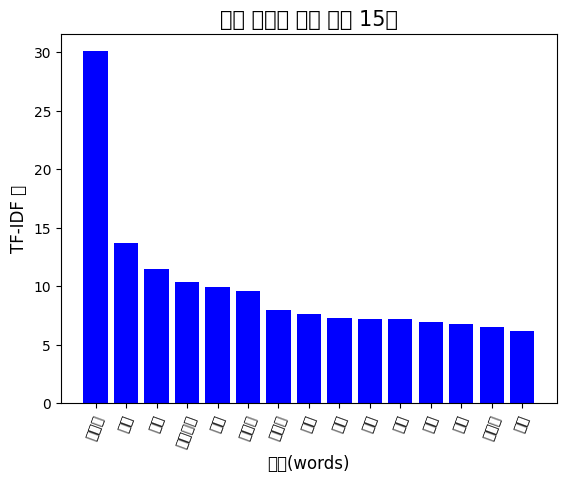

In [95]:
# 긍정 뉴스와 부정 뉴스에 많이 나온 단어 시각화(bar chart)

plt.bar(range(max_words), [i[1] for i in pos_words[:max_words]], color='blue')
plt.title('긍정 뉴스의 단어 상위 %d개'%max_words, fontsize=15)
plt.xlabel('단어(words)', fontsize=12)
plt.ylabel('TF-IDF 합', fontsize=12)
plt.xticks(range(max_words), [i[0] for i in pos_words[:max_words]], rotation=70)

plt.show()

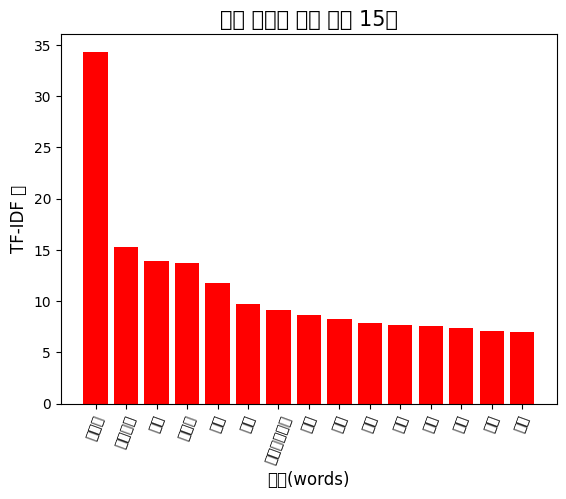

In [96]:
plt.bar(range(max_words), [i[1] for i in neg_words[:max_words]], color='red')
plt.title('부정 뉴스의 단어 상위 %d개'%max_words, fontsize=15)
plt.xlabel('단어(words)', fontsize=12)
plt.ylabel('TF-IDF 합', fontsize=12)
plt.xticks(range(max_words), [i[0] for i in neg_words[:max_words]], rotation=70)

plt.show()

LDA 분석 (토픽 모델링)

In [97]:
df['desc']

0      <b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...
1      ▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2      한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...
3      변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
4       이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...
                             ...                        
795    글로벌기업 현대.기아차가 <b>코로나</b>19의 여파로 해외시장에서 고전을 면치 ...
796    한국중부발전 본사 전경 한국중부발전(사장 박형구)은 <b>코로나</b>19 장기화로...
797    박종환 한국자유총연맹 총재 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b...
798    이상훈 회장은 “<b>코로나</b>19 신규 확진자가 수도권에서 발생했고 정부는 수...
799    제56회 대종상영화제 참석한 문가영제56회 대종상영화제 참석한 문가영 <b>코로나<...
Name: desc, Length: 800, dtype: object

In [98]:
desc = df['desc']
desc[:3]

0    <b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...
1    ▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2    한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...
Name: desc, dtype: object

In [99]:
desc_noun_tk = []

for d in desc:
    desc_noun_tk.append(okt.nouns(d)) # 명사 형태소만 추출

In [100]:
print(desc_noun_tk[:10])

[['코로나', '발', '경제', '위기', '대응', '위해', '돈', '곳', '국세', '수입', '정부', '재정', '마련', '대한', '우려', '이', '때문', '한국', '개발', '등', '국책', '연구기관', '증세', '화두', '정부', '여당', '증세'], ['지난', '창녕군', '보건소', '앞', '설치', '선', '진료', '소', '검사', '체온', '측정', '사진', '제공', '창녕군', '청', '코로나', '장기', '대비', '비대', '선', '진료', '도입', '경남', '창녕군', '지난', '도내', '최초', '코로나', '선', '진료', '소'], ['한편', '설현', '은', '최근', '코로나', '바이러스', '시리즈', '세계', '유행', '다큐멘터리', '내레이션', '처음', '도전', '호평', '의', '새', '드라마', '낮', '밤', '출연', '검토', '게임', '이벤트', '대한'], ['변화', '핵심', '중', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '의', '위기', '마주', '언제', '끝', '날', '또', '앞', '미래', '국가', '국민', '어려움', '해결', '저희'], ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀', '약'], ['올해', '신종', '코로나', '바이러스', '감염증', '코로나', '여파', '오프라인', '행사', '진행', '공식', '채널', '통해', '명칭', '초청', '작', '리스트', '공개', '한편', '반도', '국내외'], ['경찰', '코로나', '감염', '우려', '명', '이상', '집회', '봉쇄', '지난', '홍콩', '국가보안법', '시위', '때', '홍콩', '경찰', '코로나', '확산', '올해', '불허', '상황', '처음', '주최'], ['전국'

In [101]:
# 명사 형태소만 추출한 것 중에서 토큰 길이가 1보다 큰 것만 추출
desc_noun_tk2 = []

for d in desc_noun_tk:
    item = [i for i in d if len(i) > 1]
    desc_noun_tk2.append(item)

In [102]:
print(desc_noun_tk2)

[['코로나', '경제', '위기', '대응', '위해', '국세', '수입', '정부', '재정', '마련', '대한', '우려', '때문', '한국', '개발', '국책', '연구기관', '증세', '화두', '정부', '여당', '증세'], ['지난', '창녕군', '보건소', '설치', '진료', '검사', '체온', '측정', '사진', '제공', '창녕군', '코로나', '장기', '대비', '비대', '진료', '도입', '경남', '창녕군', '지난', '도내', '최초', '코로나', '진료'], ['한편', '설현', '최근', '코로나', '바이러스', '시리즈', '세계', '유행', '다큐멘터리', '내레이션', '처음', '도전', '호평', '드라마', '출연', '검토', '게임', '이벤트', '대한'], ['변화', '핵심', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '위기', '마주', '언제', '미래', '국가', '국민', '어려움', '해결', '저희'], ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀'], ['올해', '신종', '코로나', '바이러스', '감염증', '코로나', '여파', '오프라인', '행사', '진행', '공식', '채널', '통해', '명칭', '초청', '리스트', '공개', '한편', '반도', '국내외'], ['경찰', '코로나', '감염', '우려', '이상', '집회', '봉쇄', '지난', '홍콩', '국가보안법', '시위', '홍콩', '경찰', '코로나', '확산', '올해', '불허', '상황', '처음', '주최'], ['전국', '컨테이너', '처리', '국내', '항만', '신종', '코로나', '바이러스', '감염증', '코로나', '사태', '본격', '물동량', '부진', '와중', '인천', '중국', '항만', '정상화'], ['한편', '코로나', '

In [103]:
!pip install gensim

In [104]:
from gensim import corpora

import gensim.corpora as corpora

In [105]:
# 단어 사전 생성
# corpora.Dictionary()
dictionary  = corpora.Dictionary(desc_noun_tk2)

In [106]:
dictionary

In [107]:
dictionary[0]

'개발'

In [108]:
dictionary[1]

'경제'

In [109]:
# corpus (단어 말뭉치)  생성
corpus = [dictionary.doc2bow(word) for word in desc_noun_tk2]
print(corpus[:10])

# doc2bow : 단어 사전에 있는 단어에 대해 bow(bag of words) 단어주머니 구함
# (0, 1), (1, 1), (2, 1) 몬 소리예요?
# (word_idx, word_count)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1)], [(17, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 3), (33, 3), (34, 1), (35, 1), (36, 1)], [(5, 1), (17, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(12, 1), (17, 2), (43, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(17, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(17, 2), (43, 1), (52, 1), (54, 1), (61, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)], [(11, 1), (17, 2), (31, 1), (49, 1), (86, 1), (92, 1), (93, 2)

In [110]:
# 토픽 분석 위한 lda 모델 구축
from gensim.models import LdaMulticore
# 임의로 토픽 수 선정

k = 4 # 토픽 개수 설정
lda_model =  LdaMulticore(corpus, iterations=12,
                          num_topics=k, id2word=dictionary,
                          passes=1, workers=10)

# id2word=dictionary 단어 id 와 실제 단어 매핑
# passes=1 : 전체 corpus 반복 횟수 (성능을 높일려면, 수치를 올려주세요)
# workers=10 : 사용할 cpu core

Process ForkPoolWorker-1:
Process ForkPoolWorker-6:
Process ForkPoolWorker-10:
Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Traceback (most recent call last):
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-7:
  File "/usr/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-5:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr

KeyboardInterrupt: 

In [ ]:
print(lda_model.print_topics(num_topics=k, num_words = 15))

In [ ]:
!pip install pyLDAvis

In [ ]:
import os

os.environ['PYTHONIOENCODING'] = 'utf-8'

import pyLDAvis.gensim

lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [ ]:
pyLDAvis.display(lda_vis)